## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.


For this homework, we prepared a [starter notebook](homework-6-starter.ipynb). 

## Loading the data

* Use only the following columns:
    * `'neighbourhood_group',`
    * `'room_type',`
    * `'latitude',`
    * `'longitude',`
    * `'minimum_nights',`
    * `'number_of_reviews','reviews_per_month',`
    * `'calculated_host_listings_count',`
    * `'availability_365',`
    * `'price'`
* Fill NAs with 0
* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1
* Use `DictVectorizer` to turn the dataframe into matrices

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv', usecols=columns)

In [3]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

<AxesSubplot:>

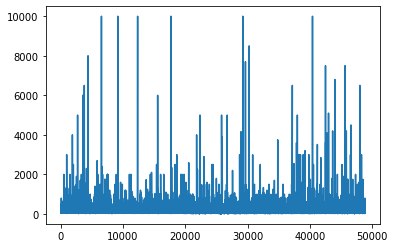

In [4]:
df["price"].plot()

<AxesSubplot:>

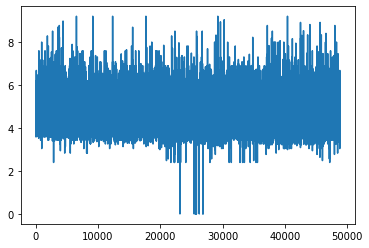

In [5]:
np.log1p(df["price"]).plot()

In [6]:
df['price'] = np.log1p(df["price"])

In [7]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [9]:
df_train.shape, df_val.shape, df_test.shape

((29337, 9), (9779, 9), (9779, 9))

In [10]:
(y_train.shape, y_val.shape, y_test.shape)

((29337,), (9779,), (9779,))

In [11]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`


Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

In [12]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [13]:
from sklearn.tree import export_text

print(export_text(dt, feature_names = dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [15]:
y_pred = rfr.predict(X_train)

In [18]:
y_pred = rfr.predict(X_val)

score = mean_squared_error(y_pred, y_val, squared=False)
score

0.4615632303514057

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

In [19]:
np.linspace(10, 200, 20)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [40]:
n_est = np.linspace(10, 200, 20,dtype=int)
score = []
for est in n_est:
    rf = RandomForestRegressor(n_estimators=est, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score.append(round(mean_squared_error(y_pred, y_val, squared=False),4))
    print("When estimator is : {} ,then the rmse : {} ".format(est, round(mean_squared_error(y_pred, y_val, squared=False),4)))

When estimator is : 10 ,then the rmse : 0.4616 
When estimator is : 20 ,then the rmse : 0.4482 
When estimator is : 30 ,then the rmse : 0.4455 
When estimator is : 40 ,then the rmse : 0.4436 
When estimator is : 50 ,then the rmse : 0.4423 
When estimator is : 60 ,then the rmse : 0.4416 
When estimator is : 70 ,then the rmse : 0.4412 
When estimator is : 80 ,then the rmse : 0.4411 
When estimator is : 90 ,then the rmse : 0.4406 
When estimator is : 100 ,then the rmse : 0.44 
When estimator is : 110 ,then the rmse : 0.4395 
When estimator is : 120 ,then the rmse : 0.4392 
When estimator is : 130 ,then the rmse : 0.4393 
When estimator is : 140 ,then the rmse : 0.439 
When estimator is : 150 ,then the rmse : 0.4389 
When estimator is : 160 ,then the rmse : 0.4387 
When estimator is : 170 ,then the rmse : 0.4386 
When estimator is : 180 ,then the rmse : 0.4388 
When estimator is : 190 ,then the rmse : 0.4387 
When estimator is : 200 ,then the rmse : 0.4388 


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`



What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [43]:
for m in [10, 15, 20, 25]:
  score = []
  for n in np.linspace(10, 200, 20,dtype=int):
    rfr = RandomForestRegressor(n_estimators=n, max_depth=m, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)
    score.append(rmse)
  
  print("average RMSE for max_depth = {} is {}".format(m, (sum(score)/len(score))))
  print("")

average RMSE for max_depth = 10 is 0.44059461928047217

average RMSE for max_depth = 15 is 0.4378511760532405

average RMSE for max_depth = 20 is 0.4402940199274069

average RMSE for max_depth = 25 is 0.4415731348211728



## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

In [44]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [45]:
rfr.feature_importances_.round(2)

array([0.08, 0.03, 0.15, 0.15, 0.05, 0.  , 0.  , 0.03, 0.  , 0.  , 0.04,
       0.05, 0.39, 0.  , 0.01])

In [46]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [47]:
from sklearn.tree import export_text

r = export_text(rfr.estimators_[0], feature_names=dv.get_feature_names())
print(r[0:50])

|--- room_type=Entire home/apt <= 0.50
|   |--- ne


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

In [48]:
import xgboost as xgb

In [49]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [50]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [51]:
print("RMSE for eta = 0.3 is {:f}".format(rmse))

RMSE for eta = 0.3 is 0.436210


In [52]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [53]:
print("RMSE for eta = 0.1 is {:f}".format(rmse))

RMSE for eta = 0.1 is 0.432497


In [54]:
%%capture output
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

y_pred = model.predict(dval)
rmse = mean_squared_error(y_val, y_pred, squared=False)

In [55]:
print("RMSE for eta = 0.01 is {:f}".format(rmse))

RMSE for eta = 0.01 is 1.630452


## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

## Nagivation

* [Machine Learning Zoomcamp course](../)
* [Session 6: Decision Trees and Ensemble Learning](./)
* Previous: [Explore more](11-explore-more.md)